In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [167]:
%matplotlib inline

In [168]:
df= pd.read_excel("E:\\ML DATA SETS\\rainfall data Australia.xlsx")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [170]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

<AxesSubplot:>

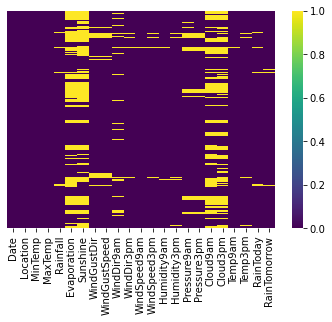

In [171]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

In [172]:
#as evaporation,sunshine,cloud 9am,cloud 3pm,pressure 9am,pressure 3pm columns has lot of null values we can drop 
df.drop(["Evaporation","Sunshine","Pressure9am","Pressure3pm","Cloud9am","Cloud3pm","Date","Location"],inplace=True,axis=1)
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,17.8,29.7,No,No


In [173]:
df.shape

(145460, 15)

<AxesSubplot:xlabel='RainToday', ylabel='count'>

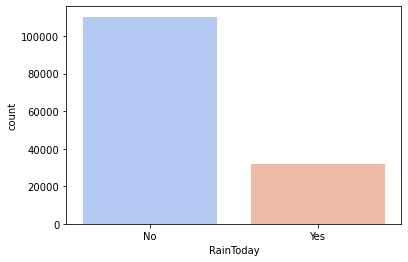

In [174]:
sns.countplot(x="RainToday",data=df,palette='coolwarm')

In [175]:
#dropping those ros which has null values
df.dropna(axis=0,inplace=True)
df.shape

(121790, 15)

In [176]:
df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [177]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

<AxesSubplot:>

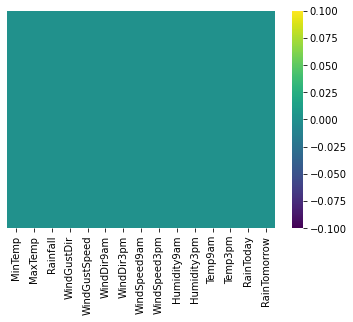

In [178]:
#now our dataset has no null values as shown by heatmap
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

# convert categorical features into dummy variable using pandas


In [179]:
Raintoday=pd.get_dummies(df["RainToday"],drop_first= True)
Raintoday.head()

,Yes
0,0
1,0
2,0
3,0
4,0


In [180]:
df=pd.concat([df,Raintoday],axis=1)
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Yes
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,16.9,21.8,No,No,0
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,17.2,24.3,No,No,0
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,21.0,23.2,No,No,0
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,18.1,26.5,No,No,0
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,17.8,29.7,No,No,0


In [181]:
df.drop("RainToday",axis=1,inplace=True)
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainTomorrow,Yes
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,16.9,21.8,No,0
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,17.2,24.3,No,0
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,21.0,23.2,No,0
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,18.1,26.5,No,0
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,17.8,29.7,No,0


# LABEL ENCODING

In [182]:
#ENCODING STRING TYPE DATA INTO NUMERICAL DATA
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["WindGustDir"]=le.fit_transform(df["WindGustDir"])
df["WindDir9am"]=le.fit_transform(df["WindDir9am"])
df["WindDir3pm"]=le.fit_transform(df["WindDir3pm"])
df["RainTomorrow"]=le.fit_transform(df["RainTomorrow"])

In [183]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainTomorrow,Yes
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,16.9,21.8,0,0
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,17.2,24.3,0,0
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,21.0,23.2,0,0
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,18.1,26.5,0,0
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,17.8,29.7,0,0


In [184]:
df["WindGustDir"]

0         13
1         14
2         15
3          4
4         13
          ..
145454     0
145455     0
145456     6
145457     3
145458     9
Name: WindGustDir, Length: 121790, dtype: int32

# DATA VISULIZATION 

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yes'>

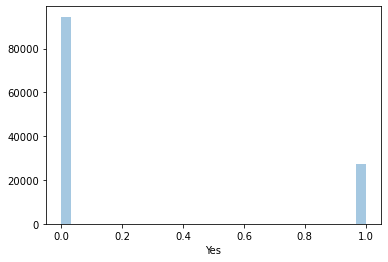

In [225]:
#histogram for rain today
sns.distplot(df["Yes"],kde=False,bins=30)

<AxesSubplot:xlabel='WindGustDir', ylabel='count'>

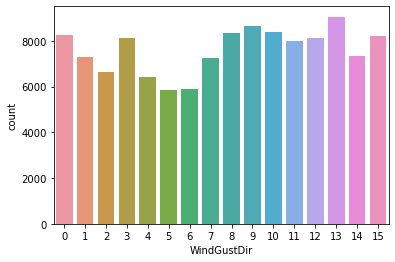

In [185]:
sns.countplot(x="WindGustDir",data=df)

<AxesSubplot:xlabel='WindDir9am', ylabel='count'>

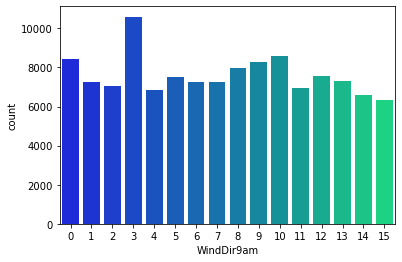

In [186]:
sns.countplot(x="WindDir9am",data=df,palette="winter")

<AxesSubplot:xlabel='Humidity9am', ylabel='Temp9am'>

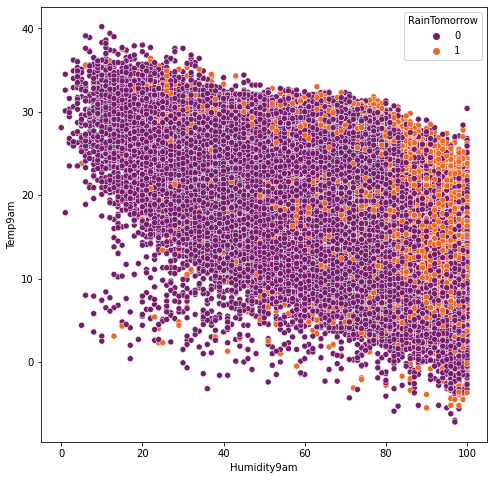

In [208]:
#scatter plot between Humidity9am and Temp9am
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Humidity9am', y = 'Temp9am', hue = 'RainTomorrow' , palette = 'inferno',data = df)

<AxesSubplot:>

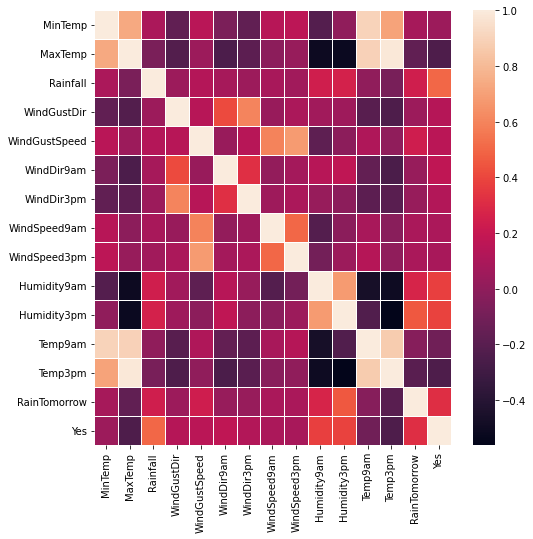

In [218]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(),lw=1)

In [188]:
x=df.drop('RainTomorrow',axis=1)
y=df['RainTomorrow']

# SPLITTING THE TRAIN AND TEST DATA

In [196]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

# 1.LOGISTIC REGRESSION MODEL


###Training and Predicting

In [197]:
from sklearn.linear_model import LogisticRegression


In [198]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predictions = LR.predict(x_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##model Evaluation

In [214]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("classification report is:")
print(classification_report(y_test,predictions))
print('\n')
print("confusion matrix is:")
print(confusion_matrix(y_test,predictions))
print('\n')
print("accuracy is:")
print(accuracy_score(y_test,predictions))

classification report is:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     18947
           1       0.75      0.50      0.60      5411

    accuracy                           0.85     24358
   macro avg       0.81      0.73      0.76     24358
weighted avg       0.84      0.85      0.84     24358



confusion matrix is:
[[18059   888]
 [ 2694  2717]]


accuracy is:
0.8529435914278677


# 2. DECISION TREE CLASSIFIER 

#Training and predicting

In [201]:
from sklearn.tree import DecisionTreeClassifier
DT= DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [202]:
predictions=DT.predict(x_test)

#model Evaluation

In [212]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("classification report is:")
print(classification_report(y_test,predictions))
print('\n')
print("confusion matrix is:")
print(confusion_matrix(y_test,predictions))
print('\n')
print("accuracy is:")
print(accuracy_score(y_test,predictions))

classification report is:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     18947
           1       0.75      0.50      0.60      5411

    accuracy                           0.85     24358
   macro avg       0.81      0.73      0.76     24358
weighted avg       0.84      0.85      0.84     24358



confusion matrix is:
[[18059   888]
 [ 2694  2717]]


accuracy is:
0.8529435914278677


# 3.RANDOM FOREST CLASSIFIER

#training and predicting

In [205]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train,y_train)

RandomForestClassifier()

In [206]:
predictions= RF.predict(x_test)

model evaluation

In [213]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("classification report is:")
print(classification_report(y_test,predictions))
print('\n')
print("confusion matrix is:")
print(confusion_matrix(y_test,predictions))
print('\n')
print("accuracy is:")
print(accuracy_score(y_test,predictions))

classification report is:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     18947
           1       0.75      0.50      0.60      5411

    accuracy                           0.85     24358
   macro avg       0.81      0.73      0.76     24358
weighted avg       0.84      0.85      0.84     24358



confusion matrix is:
[[18059   888]
 [ 2694  2717]]


accuracy is:
0.8529435914278677
